In [1]:
import torch
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
from torchvision import datasets
from torchvision.transforms import Compose, ToTensor, Lambda
from torch.utils.data import DataLoader

transformations = Compose([ToTensor(), Lambda(lambda x: x.view(-1)) ])
training_data = datasets.FashionMNIST(
    ".", 
    download=True, 
    train=True, 
    transform=transformations
)
test_data = datasets.FashionMNIST(
    ".", 
    download=True, 
    train=False, 
    transform=transformations  
)



In [4]:
training_data[1][0].size()

torch.Size([784])

## My first neural network: StupidNet™

In [5]:
model_TD1 = torch.nn.Sequential(
    torch.nn.Linear(784, 1)
    )
f = lambda x: torch.round(x)

## Training StupidNet™

In [6]:

def trainer(dataset,model,loss_fn,epoch=10,batch_size=1,rate=1e-4):
    optimizer = torch.optim.Adam(model.parameters(), lr=rate)
    batch = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    losses = []
    for e in range(epoch):
        
        for x, y in tqdm(batch, desc = f"epoch {e+1}/{epoch}"):
            optimizer.zero_grad()
            y_pred = model(x)
            loss = loss_fn(y_pred.float(), y.float())
            loss.backward()
            optimizer.step()
            losses.append(loss.item())
    return(losses)
   
    

epoch 1/10:   0%|          | 0/60000 [00:00<?, ?it/s]

epoch 2/10:   0%|          | 0/60000 [00:00<?, ?it/s]

epoch 3/10:   0%|          | 0/60000 [00:00<?, ?it/s]

epoch 4/10:   0%|          | 0/60000 [00:00<?, ?it/s]

epoch 5/10:   0%|          | 0/60000 [00:00<?, ?it/s]

epoch 6/10:   0%|          | 0/60000 [00:00<?, ?it/s]

epoch 7/10:   0%|          | 0/60000 [00:00<?, ?it/s]

epoch 8/10:   0%|          | 0/60000 [00:00<?, ?it/s]

epoch 9/10:   0%|          | 0/60000 [00:00<?, ?it/s]

epoch 10/10:   0%|          | 0/60000 [00:00<?, ?it/s]

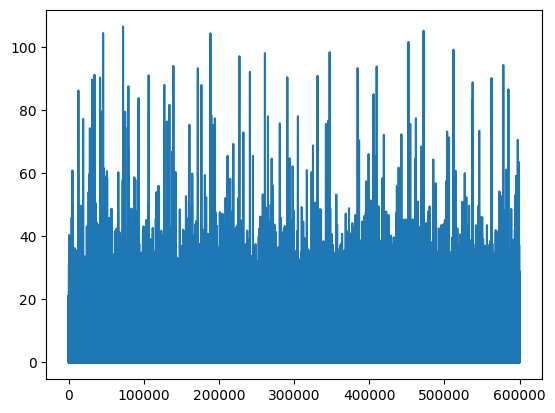

In [8]:
plt.plot(trainer(training_data,model_TD1,torch.nn.MSELoss(),epoch=10,batch_size=1,rate=1e-4))
plt.show()

In [9]:
def success_rate(model,test_data):
    success = 0
    for x, y in test_data:
        if f(model(x)) == y:
            success += 1
    return success/len(test_data)

In [10]:
success_rate(model_TD1,test_data)

0.3713

## Improving StupidNet™ : our second neural network

In [11]:

def trainer_vector(dataset, model, loss_fn, epoch=10, batch_size=1, rate=1e-4):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=rate)
    batch = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    losses = []
    for e in range(epoch):
        for x, y in tqdm(batch, desc=f"epoch {e+1}/{epoch}"):
            x = x.to(device)
            y = y.to(device)
            optimizer.zero_grad()
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            loss.backward()
            optimizer.step()
        losses.append(loss.item())
    return losses


In [12]:
model_10 = torch.nn.Sequential(
    torch.nn.Linear(784, 10),
    torch.nn.LogSoftmax(dim = 1)
    )

epoch 1/10:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 2/10:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 3/10:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 4/10:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 5/10:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 6/10:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 7/10:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 8/10:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 9/10:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 10/10:   0%|          | 0/469 [00:00<?, ?it/s]

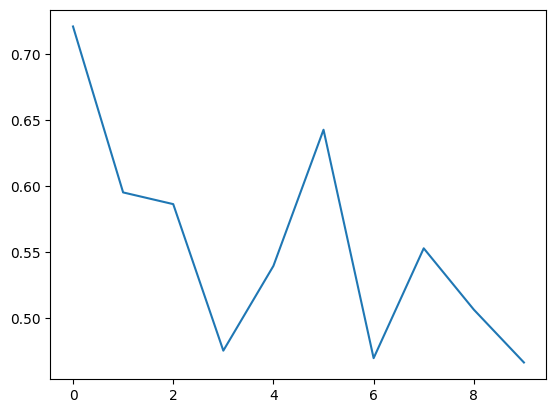

In [14]:
plt.plot(trainer_vector(training_data,model_10,torch.nn.NLLLoss(),epoch=10,batch_size=128,rate=1e-4))
plt.show()

In [15]:
def success_rate_vector(model,test_data):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    success = 0
    test_data = DataLoader(test_data, batch_size=1, shuffle=True)
    for x, y in test_data:
        x = x.to(device)
        y = y.to(device)
        if torch.argmax(model(x)) == y:
            success += 1
    return success/len(test_data)

In [16]:

success_rate_vector(model_10,test_data)

0.8214

## Activation functions

In [17]:
model_ReLU = torch.nn.Sequential(
    torch.nn.Linear(784, 128),
    torch.nn.Linear(128, 10),
    torch.nn.ReLU(),
    torch.nn.LogSoftmax(dim = 1)
    )

epoch 1/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 2/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 3/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 4/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 5/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 6/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 7/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 8/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 9/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 10/10:   0%|          | 0/938 [00:00<?, ?it/s]

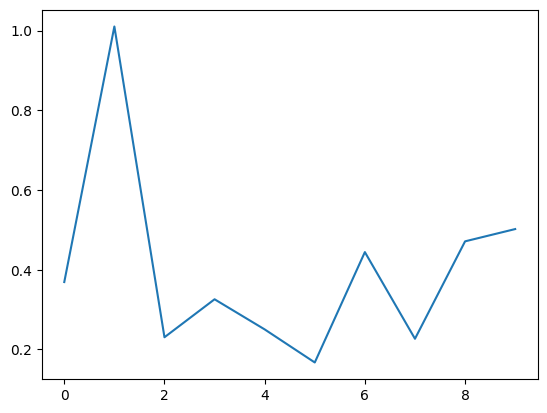

In [18]:
plt.plot(trainer_vector(training_data,model_ReLU,torch.nn.NLLLoss(),epoch=10,batch_size=64,rate=1e-4))
plt.show()

In [ ]:
success_rate_vector(model_ReLU,test_data)

0.752

In [19]:
model_Tanh = torch.nn.Sequential(
    torch.nn.Linear(784, 128),
    torch.nn.Linear(128, 10),
    torch.nn.Tanh(),
    torch.nn.LogSoftmax(dim = 1)
    )

epoch 1/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 2/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 3/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 4/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 5/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 6/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 7/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 8/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 9/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 10/10:   0%|          | 0/938 [00:00<?, ?it/s]

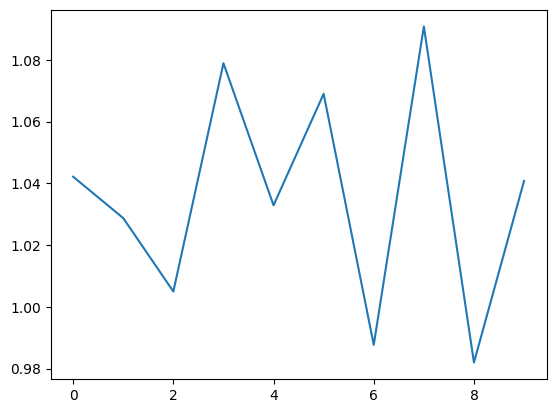

In [20]:
plt.plot(trainer_vector(training_data,model_Tanh,torch.nn.NLLLoss(),epoch=10,batch_size=64,rate=1e-4))
plt.show()

In [21]:
model_Sigmoid = torch.nn.Sequential(
    torch.nn.Linear(784, 128),
    torch.nn.Linear(128, 10),
    torch.nn.Sigmoid(),
    torch.nn.LogSoftmax(dim = 1)
    )

epoch 1/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 2/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 3/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 4/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 5/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 6/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 7/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 8/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 9/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 10/10:   0%|          | 0/938 [00:00<?, ?it/s]

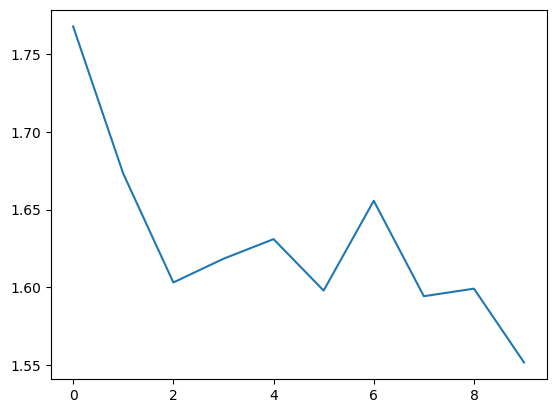

In [22]:
plt.plot(trainer_vector(training_data,model_Sigmoid,torch.nn.NLLLoss(),epoch=10,batch_size=64,rate=1e-4))
plt.show()

In [23]:
success_rate_vector(model_ReLU,test_data), success_rate_vector(model_Tanh,test_data), success_rate_vector(model_Sigmoid,test_data)

(0.8422, 0.828, 0.7681)

In [24]:
model_ReLU2 = torch.nn.Sequential(
    torch.nn.Linear(784, 512),
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 128),
    torch.nn.ReLU(),
    torch.nn.Linear(128, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 32),
    torch.nn.ReLU(),
    torch.nn.Linear(32, 10),
    torch.nn.LogSoftmax(dim = 1)
    )

epoch 1/30:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 2/30:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 3/30:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 4/30:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 5/30:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 6/30:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 7/30:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 8/30:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 9/30:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 10/30:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 11/30:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 12/30:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 13/30:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 14/30:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 15/30:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 16/30:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 17/30:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 18/30:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 19/30:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 20/30:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 21/30:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 22/30:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 23/30:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 24/30:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 25/30:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 26/30:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 27/30:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 28/30:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 29/30:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 30/30:   0%|          | 0/469 [00:00<?, ?it/s]

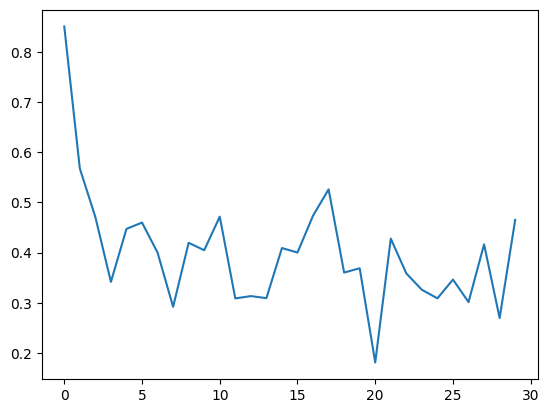

In [25]:
plt.plot(trainer_vector(training_data,model_ReLU2,torch.nn.NLLLoss(),epoch=30,batch_size=128,rate=1e-4))
plt.show()

In [26]:
success_rate_vector(model_ReLU2,test_data)

0.8669

epoch 1/20:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 2/20:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 3/20:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 4/20:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 5/20:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 6/20:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 7/20:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 8/20:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 9/20:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 10/20:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 11/20:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 12/20:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 13/20:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 14/20:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 15/20:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 16/20:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 17/20:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 18/20:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 19/20:   0%|          | 0/469 [00:00<?, ?it/s]

epoch 20/20:   0%|          | 0/469 [00:00<?, ?it/s]

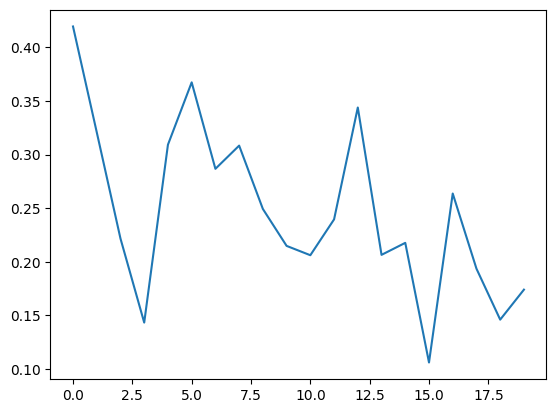

In [27]:
plt.plot(trainer_vector(training_data,model_ReLU2,torch.nn.NLLLoss(),epoch=20,batch_size=128,rate=1e-3))
plt.show()

In [28]:

import torch
import cloudpickle as pickle

def torch_saver(net, file="temp.pkl"):
    
    net_cpu = net.to('cpu')
    
    with open(file, 'wb') as f:
        pickle.dump(net_cpu, f)
    
    print(f"Model saved as {file}")
torch_saver(model_ReLU2)


Model saved as temp.pkl
